In [1]:
##NOTE: This notebook will run properly ONLY on PYTHON 3 KERNEL

import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime
%matplotlib inline
import seaborn as sns
sns.set()
from matplotlib.backends.backend_pdf import PdfPages
#from mpl_toolkits.basemap import Basemap
import matplotlib.cm as cm
import matplotlib.colors as col
import matplotlib as mpl
import numpy as np #import for transposing
import math

# Model with respect to wet/dry seasons

b:  0.9
b_d:  0.0175
s_p:  0.82475
s_j:  0.9137500000000001
s_s:  0.946
s_a:  0.96425


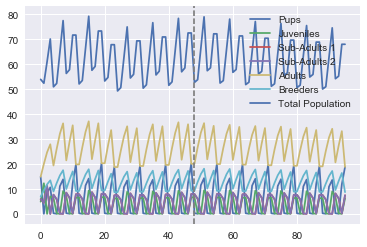

In [2]:
##Be sure to test these models with numbers (troop sizes/age distribution) from observation data

total_gen = 4*24 ##16 generations = 4 years  <=> 4x generations = x years

##Initialize population vectors
P = [0]*total_gen
J = [0]*total_gen
S1 = [0]*total_gen
S2 = [0]*total_gen
A = [0]*total_gen
R = [0]*total_gen
T = [0]*total_gen


##Enter parameter values (Random place holders entered for now)
b = (3.6)/4
b_d = (0.07)/4 #This number comes from dry_birth in 'Breeding Rates.ipynb'
s_p = 1 - (0.25*0.701)
s_j = 1 - (0.25*0.345)
s_s = 1 - (0.25*0.216)
s_a = 1 - (0.25*0.143)

parameter_list = [b,b_d,s_p,s_j,s_s,s_a]
string_list = ['b','b_d','s_p','s_j','s_s','s_a']

##Initial conditions
P[0] = 15
J[0] = 5
S1[0] = 6
S2[0] = 6
A[0] = 15
R[0] = 7
T[0] = P[0]+J[0]+S1[0]+S2[0]+A[0]+R[0]

IC_list = [P[0],J[0],S1[0],S2[0],A[0],R[0],T[0]]
IC_str = ['P0','J0','S10','S20','A0','R0','T0']

#############################################################
##Identifying the wet/dry seasons
wet_seas1 = []
wet_seas2 = []

for i in range(total_gen):
    if i == 0:
        wet_seas1.append(1)
        wet_seas2.append(2)
    else:
        wet_seas1.append(wet_seas1[i-1]+4)
        wet_seas2.append(wet_seas2[i-1]+4)
        
wet_seas = wet_seas1 + wet_seas2
##############################################################

##The model
for i in range(0,total_gen-1):
    
    ##Conditions for up to 12 years (lifespan)
    if i < 48:
        if i in wet_seas:
            #When below carrying capacity (in wet season)
            if T[i] <= 67:
                P[i+1] = b*R[i]

                J[i+1] = s_p*P[i]

                S1[i+1] = s_j*J[i]

                S2[i+1] = s_s*S1[i]

                A[i+1] = s_s*S2[i] + s_a*A[i]

                R[i+1] = (0.5*(s_s*S2[i])) + s_a*R[i]

                T[i+1] = P[i+1]+J[i+1]+S1[i+1]+S2[i+1]+A[i+1]+R[i+1]
                
            ##When at carrying capacity (in wet season)   
            else:
                P[i+1] = (P[0]/T[0])*T[i]
                
                J[i+1] = (J[0]/T[0])*T[i]
                
                S1[i+1] = (S1[0]/T[0])*T[i]
                
                S2[i+1] = (S2[0]/T[0])*T[i]
                
                A[i+1] = (A[0]/T[0])*T[i]
                
                R[i+1] = (R[0]/T[0])*T[i]
                
                T[i+1] = T[i]

        ##Conditions for dry season        
        else:
            ##When below carrying capacity (in dry season)
            if T[i] <= 67:
                P[i+1] = b_d*R[i]

                J[i+1] = s_p*P[i]

                S1[i+1] = s_j*J[i]

                S2[i+1] = s_s*S1[i]

                A[i+1] = s_s*S2[i] + s_a*A[i]

                R[i+1] = (0.5*(s_s*S2[i])) + s_a*R[i]

                T[i+1] = P[i+1]+J[i+1]+S1[i+1]+S2[i+1]+A[i+1]+R[i+1]
                
            #When at carrying capcity (in dry season)
            else:
                P[i+1] = b_d*((P[0]/T[0])*T[i])
                
                J[i+1] = (J[0]/T[0])*T[i]
                
                S1[i+1] = (S1[0]/T[0])*T[i]
                
                S2[i+1] = (S2[0]/T[0])*T[i]
                
                A[i+1] = (A[0]/T[0])*T[i]
                
                R[i+1] = (R[0]/T[0])*T[i]
                
                T[i+1] = P[i+1]+J[i+1]+S1[i+1]+S2[i+1]+A[i+1]+R[i+1]
                
    ##Conditions for over twelve years (lifespan)
    else: 
        if i in wet_seas:
            ##When below carrying capacity (in wet season)(past life expectancy)
            if T[i]<= 67:
                P[i+1] = b*R[i]

                J[i+1] = s_p*P[i]

                S1[i+1] = s_j*J[i]

                S2[i+1] = s_s*S1[i]

                A[i+1] = s_s*S2[i] + s_a*A[i] - (s_a/48)*A[i-48]

                R[i+1] = (0.5*(s_s*S2[i])) + s_a*R[i]

                T[i+1] = P[i+1]+J[i+1]+S1[i+1]+S2[i+1]+A[i+1]+R[i+1]
                
            ##When at carrying capacity (in wet season)(past life expectancy)  
            else:
                P[i+1] = (P[0]/T[0])*T[i]
                
                J[i+1] = (J[0]/T[0])*T[i]
                
                S1[i+1] = (S1[0]/T[0])*T[i]
                
                S2[i+1] = (S2[0]/T[0])*T[i]
                
                A[i+1] = (A[0]/T[0])*T[i]
                
                R[i+1] = (R[0]/T[0])*T[i]
                
                T[i+1] = P[i+1]+J[i+1]+S1[i+1]+S2[i+1]+A[i+1]+R[i+1]
                
        ##Conditions for dry season        
        else:
            ##When below carrying capacity (in dry season)(past life expectancy)
            if T[i] <= 67:
                P[i+1] = b_d*R[i]

                J[i+1] = s_p*P[i]

                S1[i+1] = s_j*J[i]

                S2[i+1] = s_s*S1[i]

                A[i+1] = s_s*S2[i] + s_a*A[i] - (s_a/48)*A[i-48]

                R[i+1] = (0.5*(s_s*S2[i])) + s_a*R[i]

                T[i+1] = P[i+1]+J[i+1]+S1[i+1]+S2[i+1]+A[i+1]+R[i+1]
                
            ##When at carrying capacity (in dry season)(past life expectancy)  
            else:
                P[i+1] = b_d*((P[0]/T[0])*T[i])
                
                J[i+1] = (J[0]/T[0])*T[i]
                
                S1[i+1] = (S1[0]/T[0])*T[i]
                
                S2[i+1] = (S2[0]/T[0])*T[i]
                
                A[i+1] = (A[0]/T[0])*T[i]
                
                R[i+1] = (R[0]/T[0])*T[i]
                
                T[i+1] = P[i+1]+J[i+1]+S1[i+1]+S2[i+1]+A[i+1]+R[i+1]

    
##Build a plot
plt.plot(range(0,total_gen),P,label = "Pups")
plt.plot(range(0,total_gen),J,label = "Juveniles")
plt.plot(range(0,total_gen),S1,label = "Sub-Adults 1")
plt.plot(range(0,total_gen),S1,label = "Sub-Adults 2")
plt.plot(range(0,total_gen),A, label = "Adults")
plt.plot(range(0,total_gen),R, label = "Breeders")
plt.plot(range(0,total_gen),T,label = "Total Population")


plt.legend()

##Print parameters
for j in range(len(parameter_list)):
    print(string_list[j] + ': ',parameter_list[j])
    
##DataFrame of model results
pop_size = pd.DataFrame(np.transpose([P,J,S1,S2,A,R,T]), columns = ["Pups","Juveniles","Sub-Adults(1)","Sub-Adults(2)","Adults","Breeders","Total Population"])
plt.axvline(48,color = 'gray', linestyle = 'dashed')